### text2vec计算文本相似度

In [7]:
import pandas as pd
import numpy as np
from text2vec import  SentenceModel, Similarity
from tqdm import tqdm
import time


In [ ]:
import sys

sys.path.append('..')
from text2vec import Similarity

# 读取Excel文件
file_path = 'D:\KnowlegdgeGraph\TextDataset\测试结果1.xlsx'
df = pd.read_excel(file_path, usecols=['事故编号', '摘要'], nrows=160)

# 定义相似度计算函数
sim_model = Similarity('shibing624/text2vec-base-chinese-paraphrase')
def calculate_similarity(df):
    similarity_matrix = []
    for i in tqdm(range(len(df))):
        similarity_row = []
        for j in range(i+1):
            doc1 = nlp(df.loc[i, '摘要'])
            doc2 = nlp(df.loc[j, '摘要'])
            #similarity = doc1.similarity(doc2)
            #similarity = sim_model.get_score(sentences1[i], sentences2[j])
            similarity = sim_model.get_score(doc1, doc2)
            similarity_row.append(similarity)
        similarity_matrix.append(similarity_row)
    return similarity_matrix

# 计算相似度矩阵并计算运行时间
start_time = time.time()
similarity_matrix = calculate_similarity(df)
end_time = time.time()
run_time = end_time - start_time
print("计算完成，用时：{:.3f}秒".format(run_time))

# 填充相似度矩阵并输出到Excel文件
similarity_matrix_full = []
for i in range(len(similarity_matrix)):
    similarity_row = similarity_matrix[i] + [0]*(len(df)-len(similarity_matrix[i]))
    similarity_matrix_full.append(similarity_row)
for i in range(len(df)):
    for j in range(i+1, len(df)):
        similarity_matrix_full[i][j] = similarity_matrix_full[j][i]

writer = pd.ExcelWriter('D:/KnowlegdgeGraph/TextDataset/7texts/t2vOriginSimilarity.xlsx', engine='openpyxl')
try:
    df_similarity = pd.read_excel(writer, sheet_name='摘要相似度', index_col=0)
except:
    df_similarity = pd.DataFrame(index=list(df['事故编号']), columns=list(df['事故编号']))
df_similarity.loc[list(df['事故编号']), list(df['事故编号'])] = similarity_matrix_full
df_similarity.to_excel(writer, sheet_name='摘要相似度')
writer.close()

In [8]:
import pandas as pd
import numpy as np
from text2vec import  SentenceModel, Similarity
from tqdm import tqdm
import time

# Two lists of sentences
sentences1 = ['如何更换花呗绑定银行卡',
              'The cat sits outside',
              'A man is playing guitar',
              'The new movie is awesome']

sentences2 = ['银行卡可以绑定在花呗上',
              'The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

sim_model = Similarity('shibing624/text2vec-base-chinese-paraphrase')
for i in range(len(sentences1)):
    for j in range(len(sentences2)):
        score = sim_model.get_score(sentences1[i], sentences2[j])
        print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[j], score))

2023-07-29 07:53:37.128 | DEBUG    | text2vec.sentence_model:__init__:76 - Use device: cuda


如何更换花呗绑定银行卡 		 银行卡可以绑定在花呗上 		 Score: 0.8423
如何更换花呗绑定银行卡 		 The dog plays in the garden 		 Score: 0.4035
如何更换花呗绑定银行卡 		 A woman watches TV 		 Score: 0.5445
如何更换花呗绑定银行卡 		 The new movie is so great 		 Score: 0.5232
The cat sits outside 		 银行卡可以绑定在花呗上 		 Score: 0.5134
The cat sits outside 		 The dog plays in the garden 		 Score: 0.7688
The cat sits outside 		 A woman watches TV 		 Score: 0.6458
The cat sits outside 		 The new movie is so great 		 Score: 0.6364
A man is playing guitar 		 银行卡可以绑定在花呗上 		 Score: 0.4537
A man is playing guitar 		 The dog plays in the garden 		 Score: 0.6738
A man is playing guitar 		 A woman watches TV 		 Score: 0.6874
A man is playing guitar 		 The new movie is so great 		 Score: 0.6654
The new movie is awesome 		 银行卡可以绑定在花呗上 		 Score: 0.4245
The new movie is awesome 		 The dog plays in the garden 		 Score: 0.6788
The new movie is awesome 		 A woman watches TV 		 Score: 0.7757
The new movie is awesome 		 The new movie is so great 		 Score: 0.8705


In [ ]:
import pandas as pd
import numpy as np
from text2vec import Similarity

# 读取数据
data = pd.read_excel(r'D:\KnowlegdgeGraph\TextDataset\测试结果1.xlsx', usecols=['事故编号', '摘要'], nrows=10)
abstracts = data['摘要'].tolist()
accident_ids = data['事故编号'].tolist()

# 初始化相似度模型
sim_model = Similarity('shibing624/text2vec-base-chinese-paraphrase')

# 计算相似度矩阵
scores = np.zeros((len(abstracts), len(abstracts)))
for i in range(len(abstracts)):
    for j in range(len(abstracts)):
        score = sim_model.get_score(abstracts[i], abstracts[j])
        scores[i][j] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, columns=accident_ids, index=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\测试结果1_similarity.xlsx')
print(result_df)

## 使用的模型
https://huggingface.co/shibing624/text2vec-base-chinese-paraphrase
在t2v中该模型性能最好，使用CoSENT算法

#### 摘要

In [ ]:
import pandas as pd
import numpy as np
from text2vec import Similarity
from tqdm import tqdm

# 记录程序开始时间
start_time = time.time()

# 读取数据
data = pd.read_excel(r'D:\KnowlegdgeGraph\TextDataset\测试结果1.xlsx', usecols=['事故编号', '摘要'])
abstracts = data['摘要'].tolist()
accident_ids = data['事故编号'].tolist()

# 初始化相似度模型
sim_model = Similarity('shibing624/text2vec-base-chinese-paraphrase')

# 计算相似度矩阵
n = len(abstracts)
scores = np.zeros((n, n))
for i in tqdm(range(n)):
    scores[i][i] = 1  # 对角线上的元素直接输出1
    for j in range(i+1, n):
        score = sim_model.get_score(abstracts[i], abstracts[j])
        scores[i][j] = score
        scores[j][i] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\7texts\t2vSimilarity2.xlsx')

# 计算程序运行时间并打印
end_time = time.time()
run_time = end_time - start_time
print("程序运行时间：{:.3f}秒".format(run_time))

#### 事故发生经过

In [ ]:
import pandas as pd
import numpy as np
from text2vec import Similarity
from tqdm import tqdm
import time

# 记录程序开始时间
start_time = time.time()

# 读取数据
data = pd.read_excel(r'D:\KnowlegdgeGraph\TextDataset\测试结果1.xlsx')
abstracts = data['事故发生经过'].tolist()
accident_ids = data['事故编号'].tolist()

# 初始化相似度模型
sim_model = Similarity('shibing624/text2vec-base-chinese-paraphrase')

# 计算相似度矩阵
n = len(abstracts)
scores = np.zeros((n, n))
for i in tqdm(range(n)):
    scores[i][i] = 1  # 对角线上的元素直接输出1
    for j in range(i+1, n):
        score = sim_model.get_score(abstracts[i], abstracts[j])
        scores[i][j] = score
        scores[j][i] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\7texts\test\事故发生经过.xlsx')

# 计算程序运行时间并打印
end_time = time.time()
run_time = end_time - start_time
print("程序运行时间：{:.3f}秒".format(run_time))

#### 应急处置情况

In [ ]:
import pandas as pd
import numpy as np
from text2vec import Similarity
from tqdm import tqdm
import time

# 记录程序开始时间
start_time = time.time()

# 读取数据
data = pd.read_excel(r'D:\KnowlegdgeGraph\TextDataset\测试结果1.xlsx')
abstracts = data['应急处置情况'].tolist()
accident_ids = data['事故编号'].tolist()

# 初始化相似度模型
sim_model = Similarity('shibing624/text2vec-base-chinese-paraphrase')

# 计算相似度矩阵
n = len(abstracts)
scores = np.zeros((n, n))
for i in tqdm(range(n)):
    scores[i][i] = 1  # 对角线上的元素直接输出1
    for j in range(i+1, n):
        score = sim_model.get_score(abstracts[i], abstracts[j])
        scores[i][j] = score
        scores[j][i] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\7texts\test\应急处置情况.xlsx')

# 计算程序运行时间并打印
end_time = time.time()
run_time = end_time - start_time
print("程序运行时间：{:.3f}秒".format(run_time))

#### 直接原因

In [1]:
import pandas as pd
import numpy as np
from text2vec import Similarity
from tqdm import tqdm
import time

# 记录程序开始时间
start_time = time.time()

# 读取数据
data = pd.read_excel(r'D:\KnowlegdgeGraph\TextDataset\测试结果1.xlsx')
abstracts = data['直接原因'].tolist()
accident_ids = data['事故编号'].tolist()

# 初始化相似度模型
sim_model = Similarity('shibing624/text2vec-base-chinese-paraphrase')

# 计算相似度矩阵
n = len(abstracts)
scores = np.zeros((n, n))
for i in tqdm(range(n)):
    scores[i][i] = 1  # 对角线上的元素直接输出1
    for j in range(i+1, n):
        score = sim_model.get_score(abstracts[i], abstracts[j])
        scores[i][j] = score
        scores[j][i] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\7texts\test\直接原因.xlsx')

# 计算程序运行时间并打印
end_time = time.time()
run_time = end_time - start_time
print("程序运行时间：{:.3f}秒".format(run_time))

2023-09-04 10:57:29.243 | DEBUG    | text2vec.sentence_model:__init__:76 - Use device: cuda
100%|██████████| 159/159 [10:18<00:00,  3.89s/it]


程序运行时间：630.326秒


#### 间接原因

In [ ]:
import pandas as pd
import numpy as np
from text2vec import Similarity
from tqdm import tqdm
import time

# 记录程序开始时间
start_time = time.time()

# 读取数据
data = pd.read_excel(r'D:\KnowlegdgeGraph\TextDataset\测试结果1.xlsx')
abstracts = data['间接原因'].tolist()
accident_ids = data['事故编号'].tolist()

# 初始化相似度模型
sim_model = Similarity('shibing624/text2vec-base-chinese-paraphrase')

# 计算相似度矩阵
n = len(abstracts)
scores = np.zeros((n, n))
for i in tqdm(range(n)):
    scores[i][i] = 1  # 对角线上的元素直接输出1
    for j in range(i+1, n):
        score = sim_model.get_score(abstracts[i], abstracts[j])
        scores[i][j] = score
        scores[j][i] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\7texts\test\间接原因.xlsx')

# 计算程序运行时间并打印
end_time = time.time()
run_time = end_time - start_time
print("程序运行时间：{:.3f}秒".format(run_time))

#### 建议追究责任人员

In [ ]:
import pandas as pd
import numpy as np
from text2vec import Similarity
from tqdm import tqdm
import time

# 记录程序开始时间
start_time = time.time()

# 读取数据
data = pd.read_excel(r'D:\KnowlegdgeGraph\TextDataset\测试结果1.xlsx')
abstracts = data['建议追究责任人员'].tolist()
accident_ids = data['事故编号'].tolist()

# 初始化相似度模型
sim_model = Similarity('shibing624/text2vec-base-chinese-paraphrase')

# 计算相似度矩阵
n = len(abstracts)
scores = np.zeros((n, n))
for i in tqdm(range(n)):
    scores[i][i] = 1  # 对角线上的元素直接输出1
    for j in range(i+1, n):
        score = sim_model.get_score(abstracts[i], abstracts[j])
        scores[i][j] = score
        scores[j][i] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\7texts\test\建议追究责任人员.xlsx')

# 计算程序运行时间并打印
end_time = time.time()
run_time = end_time - start_time
print("程序运行时间：{:.3f}秒".format(run_time))

#### 事故防范和整改措施

In [ ]:
import pandas as pd
import numpy as np
from text2vec import Similarity
from tqdm import tqdm
import time

# 记录程序开始时间
start_time = time.time()

# 读取数据
data = pd.read_excel(r'D:\KnowlegdgeGraph\TextDataset\测试结果1.xlsx')
abstracts = data['事故防范和整改措施'].tolist()
accident_ids = data['事故编号'].tolist()

# 初始化相似度模型
sim_model = Similarity('shibing624/text2vec-base-chinese-paraphrase')

# 计算相似度矩阵
n = len(abstracts)
scores = np.zeros((n, n))
for i in tqdm(range(n)):
    scores[i][i] = 1  # 对角线上的元素直接输出1
    for j in range(i+1, n):
        score = sim_model.get_score(abstracts[i], abstracts[j])
        scores[i][j] = score
        scores[j][i] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\7texts\test\事故防范和整改措施.xlsx')

# 计算程序运行时间并打印
end_time = time.time()
run_time = end_time - start_time
print("程序运行时间：{:.3f}秒".format(run_time))

### 间接原因

In [ ]:
import pandas as pd
import numpy as np
from text2vec import Similarity
from tqdm import tqdm
import time

# 记录程序开始时间
start_time = time.time()

# 读取数据
data = pd.read_excel(r'D:\KnowlegdgeGraph\TextDataset\文本细分信息\间接原因-分句.xlsx')
abstracts = data['间接原因'].tolist()
accident_ids = data['句编号'].tolist()

# 读取数据
#data = pd.read_excel(r'DD:\KnowlegdgeGraph\TextDataset\文本细分信息\建议追究责任人员（不建议分句）.xlsx')
#abstracts = data['建议追究责任人员'].tolist()
#accident_ids = data['句编号'].tolist()

# 读取数据
#data = pd.read_excel(r'DD:\KnowlegdgeGraph\TextDataset\文本细分信息\事故防范和整改措施-分句.xlsx')
#abstracts = data['事故防范和整改措施'].tolist()
#accident_ids = data['句编号'].tolist()

# 初始化相似度模型
sim_model = Similarity('shibing624/text2vec-base-chinese-paraphrase')

# 计算相似度矩阵
n = len(abstracts)
scores = np.zeros((n, n))
for i in tqdm(range(n)):
    scores[i][i] = 1  # 对角线上的元素直接输出1
    for j in range(i+1, n):
        score = sim_model.get_score(abstracts[i], abstracts[j])
        scores[i][j] = score
        scores[j][i] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\\7texts\\test\\间接原因（句子颗粒）.xlsx')

# 输出相似度矩阵
#result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
#result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\\7texts\\test\\建议追究责任人员（句子颗粒）.xlsx')

# 输出相似度矩阵
#result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
#result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\\7texts\\test\\事故防范和整改措施（句子颗粒）.xlsx')

# 计算程序运行时间并打印
end_time = time.time()
run_time = end_time - start_time
print("程序运行时间：{:.3f}秒".format(run_time))

#### 总文本计算

In [ ]:
import pandas as pd
import numpy as np
from text2vec import Similarity
from tqdm import tqdm
import time

# 记录程序开始时间
start_time = time.time()

# 读取数据
data = pd.read_excel(r'D:\KnowlegdgeGraph\TextDataset\测试结果1.xlsx')
accident_ids = data['事故编号'].tolist()
abstracts = data['摘要'].tolist()
b = data['事故发生经过'].tolist()
c = data['应急处置情况'].tolist()
d = data['直接原因'].tolist()
e = data['间接原因'].tolist()

# 初始化相似度模型
sim_model = Similarity('shibing624/text2vec-base-chinese-paraphrase')

# 计算相似度矩阵
n = len(b)
scores = np.zeros((n, n))
for i in tqdm(range(n)):
    scores[i][i] = 1  # 对角线上的元素直接输出1
    for j in range(i+1, n):
        score = sim_model.get_score(b[i], b[j])
        scores[i][j] = score
        scores[j][i] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\7texts\test\事故发生经过.xlsx')

# 计算相似度矩阵
n = len(c)
scores = np.zeros((n, n))
for i in tqdm(range(n)):
    scores[i][i] = 1  # 对角线上的元素直接输出1
    for j in range(i+1, n):
        score = sim_model.get_score(c[i], c[j])
        scores[i][j] = score
        scores[j][i] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\7texts\test\应急处置情况.xlsx')

# 计算相似度矩阵
n = len(d)
scores = np.zeros((n, n))
for i in tqdm(range(n)):
    scores[i][i] = 1  # 对角线上的元素直接输出1
    for j in range(i+1, n):
        score = sim_model.get_score(d[i], d[j])
        scores[i][j] = score
        scores[j][i] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\7texts\test\直接原因.xlsx')

# 计算相似度矩阵
n = len(e)
scores = np.zeros((n, n))
for i in tqdm(range(n)):
    scores[i][i] = 1  # 对角线上的元素直接输出1
    for j in range(i+1, n):
        score = sim_model.get_score(e[i], e[j])
        scores[i][j] = score
        scores[j][i] = score

# 输出相似度矩阵
result_df = pd.DataFrame(scores, index=accident_ids, columns=accident_ids)
result_df.to_excel(r'D:\KnowlegdgeGraph\TextDataset\7texts\test\间接原因.xlsx')

# 计算程序运行时间并打印
end_time = time.time()
run_time = end_time - start_time
print("程序运行时间：{:.3f}秒".format(run_time))

### 绘制相似度频率分布图

C:\Users\hasee\AppData\Local\Temp\ipykernel_37188\61678479.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  scores = data.where(pd.np.triu(pd.np.ones(data.shape)).astype(bool)).stack().values


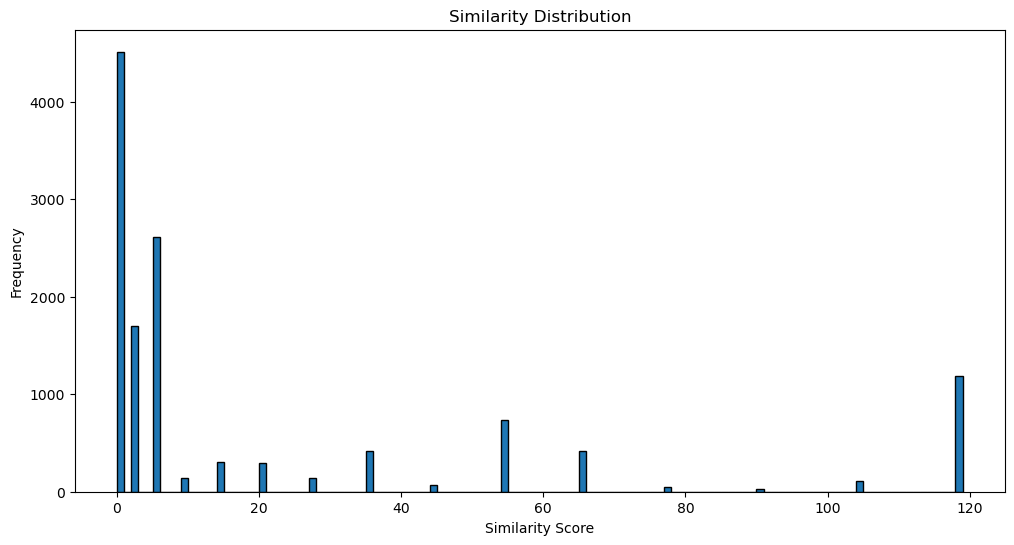

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取数据
data = pd.read_excel(r'D:\KnowlegdgeGraph\TextDataset\相似度矩阵\直接原因层次聚类相似度矩阵.xlsx', index_col=0)

# 取出主对角线以上的数据
scores = data.where(pd.np.triu(pd.np.ones(data.shape)).astype(bool)).stack().values

# 绘制直方图
fig, ax = plt.subplots(figsize=(12, 6))
bins = np.arange(0, 120, 1)
ax.hist(scores, bins=bins, edgecolor='black')
ax.set_xlabel('Similarity Score')
ax.set_ylabel('Frequency')
ax.set_title('Similarity Distribution')
plt.show()

### 绘制直方图

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置文件夹路径
folder_path = r'D:\KnowlegdgeGraph\TextDataset\7texts\test'
#save_folder_path = r'D:\KnowlegdgeGraph\TextDataset\7texts\statistical chart'

# 遍历文件夹中的所有文件
for file_name in os.listdir(folder_path):
    # 如果不是 Excel 文件，则跳过
    if not file_name.endswith('.xlsx'):
        continue
    # 获取文件路径和文件名
    file_path = os.path.join(folder_path, file_name)
    title = os.path.splitext(file_name)[0]

    # 读取数据
    data = pd.read_excel(file_path, index_col=0)

    # 取出主对角线以上的数据
    scores = data.where(pd.np.triu(pd.np.ones(data.shape)).astype(pd.np.bool)).stack().values

    # 绘制直方图
    fig, ax = plt.subplots(figsize=(12, 6))
    bins = np.arange(0, 1, 0.01)
    ax.hist(scores, bins=bins, edgecolor='black')
    ax.set_xlabel('Similarity Score')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    plt.show()
    
    # 保存图像
    #save_file_path = os.path.join(save_folder_path, title + '.tiff')
    plt.savefig(save_file_path)
    plt.show()

### 转化相似度矩阵为network格式

In [14]:
import pandas as pd
import os

# 设置输入和输出路径
input_file = r'D:\KnowlegdgeGraph\TextDataset\相似度矩阵\直接原因层次聚类相似度矩阵.xlsx'
output_dir = r'D:\KnowlegdgeGraph\TextDataset\相似度矩阵\network格式'

# 读取Excel文件
xl = pd.ExcelFile(input_file)

# 遍历Excel文件中的所有工作表
for sheet_name in xl.sheet_names:
    # 读取工作表
    df = xl.parse(sheet_name, index_col=0)

    # 将矩阵转化为边列表
    edges = []
    for i, col in enumerate(df.columns):
        for j, row in enumerate(df.index):
            if pd.notna(df.loc[row, col]) and j < i:
                edges.append((row, col, df.loc[row, col]))

    # 生成节点列表
    nodes = list(df.index)

    # 生成network文件
    network_str = '*Nodes\n'
    for i, node in enumerate(nodes):
        network_str += f'{i+1}\t"{node}"\t0\t0\n'

    network_str += '*Edges\n'
    for i, (n1, n2, weight) in enumerate(edges):
        network_str += f'{nodes.index(n1)+1}\t{nodes.index(n2)+1}\t{weight}\n'

    # 保存network文件
    output_file_name = os.path.join(output_dir, f'{sheet_name}.txt')
    with open(output_file_name, 'w', encoding='utf-8') as f:
        f.write(network_str)

#### 只输出*Edge信息

In [ ]:
import pandas as pd
import os
from tqdm import tqdm

# 设置输入和输出路径
input_file = r'D:\KnowlegdgeGraph\TextDataset\7texts\t2v相似度矩阵.xlsx'
output_dir = r'D:\KnowlegdgeGraph\TextDataset\Vos可视化\network\Edge'

# 读取Excel文件
xl = pd.ExcelFile(input_file)

# 遍历Excel文件中的所有工作表
for sheet_name in tqdm(xl.sheet_names, desc='Processing sheets'):
    # 读取工作表
    df = xl.parse(sheet_name, index_col=0)

    # 将矩阵转化为边列表
    edges = []
    for i, col in enumerate(tqdm(df.columns, desc='Processing columns', leave=False)):
        for j, row in enumerate(df.index):
            if pd.notna(df.loc[row, col]) and j < i:
                edges.append((row, col, df.loc[row, col]))

    # 生成节点列表
    nodes = list(df.index)

    # 生成network文件
    network_str = '*Nodes\n'
    for i, node in enumerate(nodes):
        network_str += f'{i+1}\t"{node}"\t0\t0\n'

    network_str += '*Edges\n'
    for i, (n1, n2, weight) in enumerate(edges):
        network_str += f'{nodes.index(n1)+1}\t{nodes.index(n2)+1}\t{weight}\n'

    # 保存network文件，只输出*Edges以下的部分
    output_file_name = os.path.join(output_dir, f'{sheet_name}.txt')
    with open(output_file_name, 'w', encoding='utf-8') as f:
        f.write('\n'.join(network_str.split('*Edges\n')[1:]))

## 设置参数数据蒸馏，并分别输出node和edge信息

In [4]:
import pandas as pd

y = 12  # 每行提取的数据数

# 读取 Excel 文件
df = pd.read_excel(r'D:\KnowlegdgeGraph\TextDataset\7texts\直接原因试验.xlsx', index_col=0)

# 提取每行中最大的 x 个值
df = df.apply(lambda x: x.nlargest(y), axis=1)

# 生成边列表和节点列表
edges = set()
nodes = set()
for i, row in enumerate(df.values):
    for j, value in enumerate(row):
        if i < j and pd.notna(value):
            edges.add((df.index[i], df.columns[j], value))
            nodes.add(df.index[i])
            nodes.add(df.columns[j])

# 输出节点信息
with open(f'D:\\KnowlegdgeGraph\\TextDataset\\Vos可视化\\直接原因前y关系\\node-{y}.txt', 'w') as f:
    f.write('id\tlabel\n')
    node_id = {node: i+1 for i, node in enumerate(nodes)}
    for node, id in node_id.items():
        f.write(f'{id}\t{node}\n')

# 输出边信息
with open(f'D:\\KnowlegdgeGraph\\TextDataset\\Vos可视化\\直接原因前y关系\\edge-{y}.txt', 'w') as f:
    node_id = {node: i+1 for i, node in enumerate(nodes)}
    for edge in edges:
         f.write(f'{node_id[edge[0]]}\t{node_id[edge[1]]}\t{edge[2]}\n')

## 按顺序对应id和lable生成node和edge信息

In [35]:
import os
import pandas as pd
from tqdm import tqdm

# 读取 Excel 文件
input_file_path = r'D:\KnowlegdgeGraph\TextDataset\相似度矩阵\事故发生经过层次聚类相似度矩阵.xlsx'
df = pd.read_excel(input_file_path, index_col=0)

# 将小于等于0的元素设置为NaN
df.mask(df <= 0, inplace=True)

# 将矩阵转化为边列表
edges = []
for i, col in enumerate(tqdm(df.columns, desc='Processing edges')):
    for j, row in enumerate(df.index):
        if pd.notna(df.loc[row, col]) and j < i:
            edges.append((row, col, df.loc[row, col]))

# 生成节点信息
nodes = list(df.index)
node_dict = {}
for i, node in enumerate(nodes):
    node_dict[node] = str(i + 1)

# 生成边信息
edge_str = 'source\ttarget\tweight\n'
for i, (n1, n2, weight) in enumerate(tqdm(edges, desc='Generating edges')):
    edge_str += f'{node_dict[n1]}\t{node_dict[n2]}\t{weight}\n'

# 保存节点信息  
node_str = 'id\tlabel\n'
for node, node_id in node_dict.items():
    node_str += f'{node_id}\t"{node}"\n'
node_file_path = r'D:\KnowlegdgeGraph\TextDataset\相似度矩阵\network格式\node\事故发生经过node.txt'
with open(node_file_path, 'w', encoding='utf-8') as f:
    f.write(node_str)

# 保存边信息
edge_file_path = r'D:\KnowlegdgeGraph\TextDataset\相似度矩阵\network格式\edge\事故发生经过edge.txt'
with open(edge_file_path, 'w', encoding='utf-8') as f:
    f.write(edge_str)